# ASSIST: publication figures

Here we regenerate the figures for the ASSIST publication one place.  This allows ASSIST users to see exactly how those figures were made.

This notebook assumes that you have install ASSIST and the ephemeris files. If you are unfamiliar with ASSIST, we suggest that you first look at the "Getting started" notebook.

First, let's import REBOUND, ASSIST as well as numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
import assist 
au2m = 149597870700
au_km = au2m/1000.

Next, we create an ephemeris structure. ASSIST will use this structure to access the JPL Ephemeris files during the integrations. Depending on where you have stored the files, you might need to adjust the paths.

In [2]:
#ephem = assist.Ephem("../data/de440.bsp", "../data/sb441-n16.bsp")
ephem = assist.Ephem("../data/de441.bsp",  "../data/sb441-n16.bsp")

### Simple Figure

In [3]:
sim = rebound.Simulation()
holman_initial = rebound.Particle(
    x=3.338875348598862E+00, y=-9.176518412197102E-01, z=-5.038590741719294E-01, 
    vx=2.805663364339457E-03, vy=7.550408665778840E-03, vz=2.980028207875623E-03)
sim.add(holman_initial)

scale=1e-8
sim.add(holman_initial + rebound.Particle(x=scale))
sim.add(holman_initial + rebound.Particle(y=scale))
sim.add(holman_initial + rebound.Particle(z=scale))
sim.add(holman_initial + rebound.Particle(vx=scale))
sim.add(holman_initial + rebound.Particle(vy=scale))
sim.add(holman_initial + rebound.Particle(vz=scale))

ex = assist.Extras(sim, ephem)

In [4]:
var = sim.add_variation(testparticle=0)
var.particles[0].x = 1.0

var = sim.add_variation(testparticle=0)
var.particles[0].y = 1.0

var = sim.add_variation(testparticle=0)
var.particles[0].z = 1.0

var = sim.add_variation(testparticle=0)
var.particles[0].vx = 1.0

var = sim.add_variation(testparticle=0)
var.particles[0].vy = 1.0

var = sim.add_variation(testparticle=0)
var.particles[0].vz = 1.0

In [5]:
trange = 10_000
N = 500 # number of outputs
times = np.linspace(sim.t, sim.t+trange, N)

pos_holman = np.zeros((N,7,3))
pos_holman_per = np.zeros((N,6,3))
pos_holman_var = np.zeros((N,6,3))

for i in range(N):
    ex.integrate_or_interpolate(times[i])
    for j in range(7):
        pos_holman[i,j] = sim.particles[j].xyz
    for j in range(6):
        pos_holman_var[i,j] = sim.particles[7+j].xyz

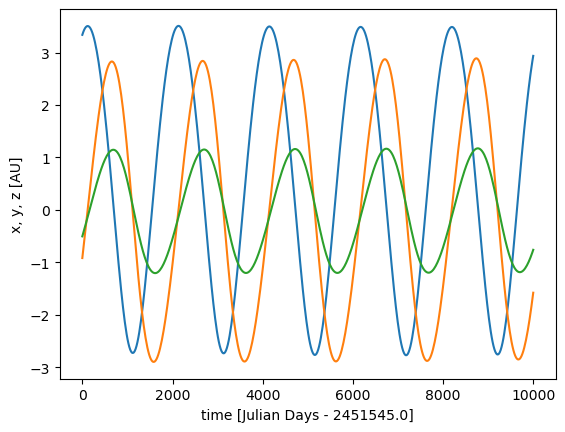

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel("time [Julian Days - %.1f]"%ephem.jd_ref)
ax.set_ylabel("x, y, z [AU]")
ax.plot(times, pos_holman[:,0,:]);

### Figure 1.

Text(0, 0.5, 'AU')

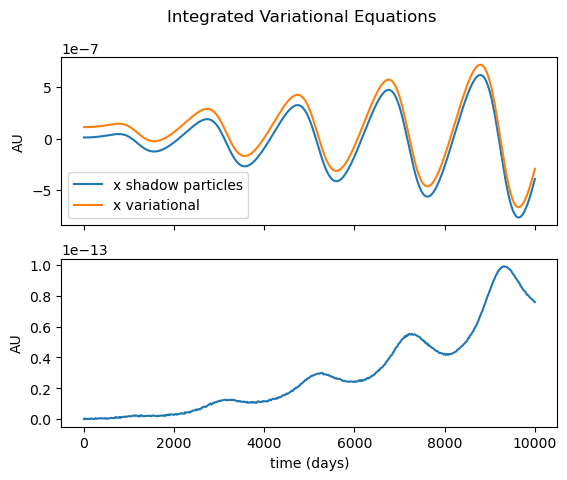

In [7]:
scale=1e-8
fig, axs = plt.subplots(2)
fig.suptitle('Integrated Variational Equations')

axs[0].plot(times, (pos_holman[:,1,:]-pos_holman[:,0,:])[:,0], label='x shadow particles')
axs[0].plot(times, pos_holman_var[:,0,0]*scale+1e-7, label='x variational')
axs[0].set_ylabel("AU")
axs[0].legend()
axs[0].label_outer()

axs[1].plot(times, np.linalg.norm((pos_holman[:,1,:]-pos_holman[:,0,:]-pos_holman_var[:,0,:]*scale), axis=1))
axs[1].set_xlabel("time (days)")
axs[1].set_ylabel("AU")
#plt.savefig('numerical_vs_analytic_2panel.pdf')

In [8]:
ex.detach(sim)
del(sim)

### Figure 2.

In [9]:
def round_trip(trange):
    sim = rebound.Simulation()
    t0 = 2458849.5-ephem.jd_ref;
    x0=3.338875348598862E+00
    y0=-9.176518412197102E-01
    z0=-5.038590741719294E-01
    vx0=2.805663364339457E-03
    vy0=7.550408665778840E-03
    vz0=2.980028207875623E-03
    holman_initial = rebound.Particle(x=x0, y=y0, z=z0, vx=vx0, vy=vy0, vz=vz0)
    sim.add(holman_initial)
    ex = assist.Extras(sim, ephem)
    ex.gr_eih_sources = 11
    
    sim.t=t0
    sim.dt=20
    sim.integrate(t0+trange)
    
    sim.dt *=-1
    sim.integrate(t0)
    
    d = np.linalg.norm((sim.particles[0]-holman_initial).xyz)*au2m
    
    ex.detach(sim)
    del(sim)
    
    return(d)

In [10]:
results=[]
for trange in np.logspace(0, 5, num=30):
    results.append((trange, round_trip(trange)))

t = np.array(list(map(lambda x: x[0], results)))
dx = list(map(lambda x: x[1], results))

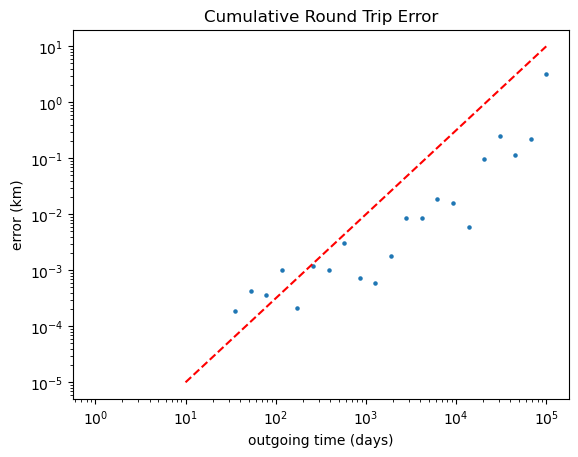

In [13]:
plt.scatter(t[:], dx[:], s=5)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('outgoing time (days)')
plt.ylabel('error (km)')
plt.title('Cumulative Round Trip Error')
plt.plot((1e1,1e5), (1e-5,1e+1), '--', c='r')
#plt.savefig('roundtrip_Holman.pdf')

### Figure 4

In [15]:
t_initial = 2.4621385359989386E+06 - ephem.jd_ref # Julian Days relative to jd_ref
t_final = 2.4625030372426095E+06  - ephem.jd_ref

apophis_initial_helio = rebound.Particle(x = -5.5946538550488467E-01,
                                         y =  8.5647564757574524E-01,
                                         z =  3.0415066217102504E-01,
                                         vx= -1.3818324735920729E-02,
                                         vy= -6.0088275597937595E-03,
                                         vz= -2.5805044631307368E-03)

apophis_final_jpl = rebound.Particle(x =  1.7028330901729331E-02,
                                     y =  1.2193934090901304E+00,
                                     z =  4.7823589236374386E-01,
                                     vx= -1.3536187639388663E-02,
                                     vy=  5.3200999989786943E-04,
                                     vz= -1.6648346717629861E-05)

apophis_final_jpl += ephem.get_particle("sun", t_final) # convert from heliocentric to barycentric
'''
apophis_initial_helio = rebound.Particle(x = -5.5946538550488512E-01, # AU
                                         y =  8.5647564757574512E-01, 
                                         z =  3.0415066217102493E-01,
                                         vx= -1.3818324735921638E-02, # AU/day
                                         vy= -6.0088275597939191E-03, 
                                         vz= -2.5805044631309632E-03)
'''
sun_initial = ephem.get_particle("sun", t_initial)

# convert from heliocentric to barycentric coordinates
apophis_initial = apophis_initial_helio + sun_initial 

In [16]:
sim = rebound.Simulation()
sim.add(apophis_initial)
sim.t = t_initial 
sim.dt = 1.0
sim.ri_ias15.min_dt = 0.001
ex = assist.Extras(sim, ephem)
params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.0])
ex.particle_params = params
ex.gr_eih_sources = 11

sim2 = rebound.Simulation()
sim2.add(apophis_initial + rebound.Particle(x=1e-15))
sim2.t = t_initial 
sim2.dt = 1.0
sim2.ri_ias15.min_dt = 0.001
ex2 = assist.Extras(sim2, ephem)
ex2.particle_params = params

In [17]:

t_final = 2.4625030372426095E+06  - ephem.jd_ref
times = []
dts = []
diffs = []
while(sim.t < t_final):
    times.append(sim.t)
    sim.step()
    sim2.step()
    dts.append(sim.dt_last_done)
    diff = np.linalg.norm(np.array(sim2.particles[0].xyz)-
                          np.array(sim.particles[0].xyz))
    diffs.append(diff)

times=np.array(times)
dts=np.array(dts)
diffs=np.array(diffs)

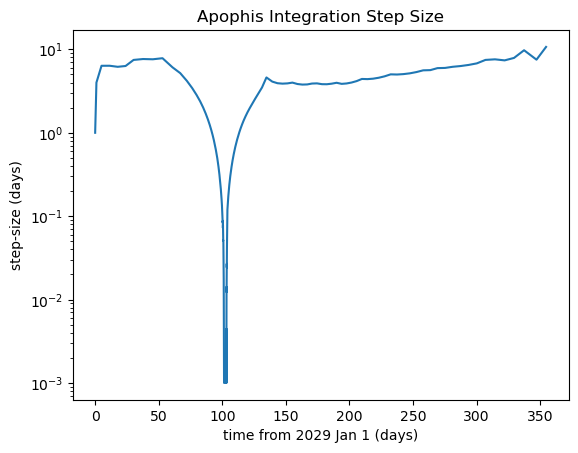

In [18]:

fig, ax = plt.subplots()
#ax.set_aspect("equal")
ax.plot(times-times[0], dts)
ax.set_title('Apophis Integration Step Size')
ax.set_xlabel("time from 2029 Jan 1 (days)")
ax.set_ylabel("step-size (days)")
ax.set_yscale('log')

#plt.xlim(0,110)
#plt.savefig('apophis_step_size.pdf')
#plt.xlim(0,110)

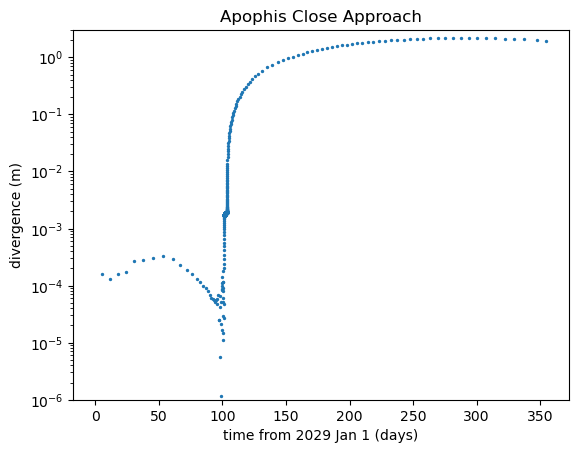

In [19]:
plt.scatter(times-times[0], diffs, s=2)
plt.yscale('log')
plt.ylim(1e-6, 3)
#plt.xlim(0,120)
plt.title('Apophis Close Approach')
plt.xlabel('time from 2029 Jan 1 (days)')
plt.ylabel('divergence (m)')
plt.savefig('apophis_divergence.pdf')


In [20]:
ex.detach(sim)
del(sim)

ex2.detach(sim2)
del(sim2)

### Figure 3

In [21]:
t_initial = 2.4621385359989386E+06 - ephem.jd_ref # Julian Days relative to jd_ref

apophis_initial_helio = rebound.Particle(x = -5.5946538550488512E-01, # AU
                                         y =  8.5647564757574512E-01, 
                                         z =  3.0415066217102493E-01,
                                         vx= -1.3818324735921638E-02, # AU/day
                                         vy= -6.0088275597939191E-03, 
                                         vz= -2.5805044631309632E-03)

sun_initial = ephem.get_particle("sun", t_initial)

# convert from heliocentric to barycentric coordinates
apophis_initial = apophis_initial_helio + sun_initial 

t_final = 2.4625030372426095E+06  - ephem.jd_ref

apophis_final_jpl = rebound.Particle(x =  1.7028330901729331E-02,
                                     y =  1.2193934090901304E+00,
                                     z =  4.7823589236374386E-01,
                                     vx= -1.3536187639388663E-02,
                                     vy=  5.3200999989786943E-04,
                                     vz= -1.6648346717629861E-05)

# convert from heliocentric to barycentric
apophis_final_jpl += ephem.get_particle("sun", t_final)

In [22]:
sim = rebound.Simulation()
sim.add(apophis_initial)
sim.t = t_initial 
sim.dt = 1.0
sim.ri_ias15.min_dt = 0.001
ex = assist.Extras(sim, ephem)
ex.particle_params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.0])
ex.gr_eih_sources = 11

In [23]:
t_final = 2.4625030372426095E+06  - ephem.jd_ref
N_samples = 10000
times = np.linspace(t_initial, t_final, N_samples, endpoint=True)
apophis_pos = np.zeros((N_samples, 3))
earth_pos = np.zeros((N_samples, 3))
for i, t in enumerate(times):
    ex.integrate_or_interpolate(t)
    apophis_pos[i] = sim.particles[0].xyz
    earth_pos[i] = ephem.get_particle("earth", t).xyz

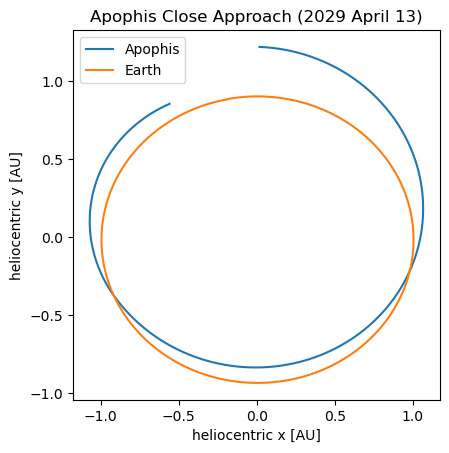

In [24]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlabel("heliocentric x [AU]"); ax.set_ylabel("heliocentric y [AU]")
ax.plot(apophis_pos[:,0],apophis_pos[:,1], label="Apophis")
ax.plot(earth_pos[:,0],earth_pos[:,1], label="Earth")
ax.set_title('Apophis Close Approach (2029 April 13)')
ax.legend();


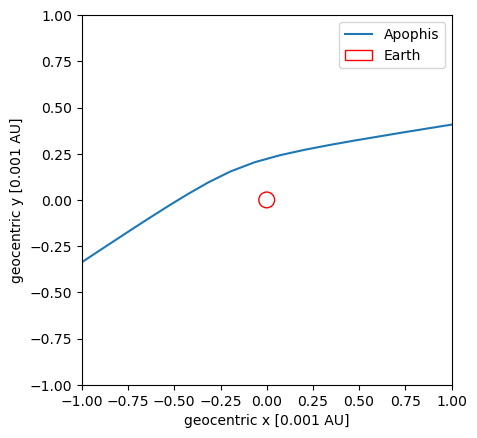

In [25]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlabel("geocentric x [0.001 AU]"); ax.set_ylabel("geocentric y [0.001 AU]")
ax.set_xlim([-1,1]); ax.set_ylim([-1,1])
ax.plot((apophis_pos[:,0]-earth_pos[:,0])*1e3,(apophis_pos[:,1]-earth_pos[:,1])*1e3, label="Apophis")
c = plt.Circle((0,0),4.2587571e-02, edgecolor="r", facecolor='None', label="Earth")
ax.add_patch(c)
ax.legend();

In [26]:
delta = sim.particles[0] - apophis_final_jpl
delta_pos = np.sqrt(delta.x**2 + delta.y**2 + delta.z**2) 
delta_pos *= 149597870700 # convert from AU to meters
print("Difference: %.2f m" %delta_pos)

Difference: 144.52 m


In [173]:
ex.detach(sim)
del(sim)


### Figure 5, version 1

In [170]:
t_initial = 2462137.5 - ephem.jd_ref # Julian Days relative to jd_ref

apophis_initial_helio = rebound.Particle(x = -5.450770368702937E-01, # AU 
                                         y =  8.625884531011220E-01, 
                                         z =  3.067841508125688E-01,
                                         vx= -1.395794822904029E-02, # AU/day
                                         vy= -5.791529394125580E-03, 
                                         vz= -2.503280483635055E-03)

sun_initial = ephem.get_particle("sun", t_initial)
# convert from heliocentric to barycentric coordinates
apophis_initial = apophis_initial_helio + sun_initial 


In [171]:

sim = rebound.Simulation()
sim.add(apophis_initial + rebound.Particle(z=1e-15))
sim.t = t_initial 
sim.dt = 1.0
sim.ri_ias15.min_dt = 0.001
#sim.ri_ias15.epsilon = 1e-6
ex = assist.Extras(sim, ephem)
ex.gr_eih_sources = 11

params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.0])
ex.particle_params = params

res = []
with open('apophis_sb_daily_v2.txt') as file:
    file.readline()
    file.readline()
    file.readline()
    for i, line in enumerate(file):
        
        t_target = float(line.split()[3]) - ephem.jd_ref
        
        vec = np.array(line.rstrip().split()[-3:], dtype=np.double)
        
        sim.integrate(t_target)
        #ex.integrate_or_interpolate(t_target)
        
        apophis = np.array(sim.particles[0].xyz)

        sun = ephem.get_particle("sun", t_target)
        apophis_sb=vec/au_km + np.array([sun.x, sun.y, sun.z])
        diff = np.linalg.norm(apophis - apophis_sb)*au2m
        res.append((t_target-t_initial, diff))

res=np.array(res)

Text(0.5, 1.0, 'Difference in Integrated Apophis Position')

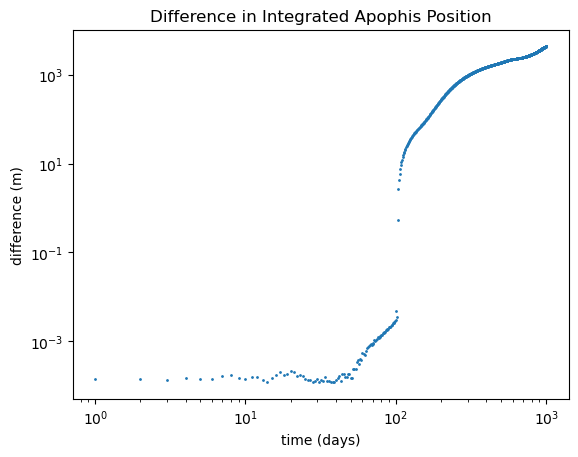

In [172]:
plt.scatter(res[:,0], res[:,1], s=1)
plt.xlabel('time (days)')
plt.ylabel('difference (m)')
plt.yscale('log')
plt.xscale('log')
plt.title('Difference in Integrated Apophis Position')

In [177]:
ex.detach(sim)
del(sim)


### Figure 5, version 2

In [178]:
t_initial = 2.4621385359989386E+06 - ephem.jd_ref # Julian Days relative to jd_ref

apophis_initial_helio = rebound.Particle(x = -5.5946538550488512E-01, # AU
                                         y =  8.5647564757574512E-01, 
                                         z =  3.0415066217102493E-01,
                                         vx= -1.3818324735921638E-02, # AU/day
                                         vy= -6.0088275597939191E-03, 
                                         vz= -2.5805044631309632E-03)

sun_initial = ephem.get_particle("sun", t_initial)

# convert from heliocentric to barycentric coordinates
apophis_initial = apophis_initial_helio + sun_initial 

In [179]:
sim = rebound.Simulation()
sim.add(apophis_initial) # + rebound.Particle(z=1e-15))
sim.t = t_initial 
sim.dt = 1.0
sim.ri_ias15.min_dt = 0.001
sim.ri_ias15.epsilon = 1e-6
ex = assist.Extras(sim, ephem)
ex.gr_eih_sources = 11

params = np.array([4.999999873689E-13, -2.901085508711E-14, 0.0])
ex.particle_params = params

res = []

with open('Apophis.log') as file:
    for i, line in enumerate(file):
        if line.startswith(' --------'):
            break
    for i, line in enumerate(file):
        if line.startswith('1'):
            break
        t_target = float(line.split()[0]) - ephem.jd_ref
        vec = np.array(line.rstrip().split()[-3:], dtype=np.double)
        
        #sim.integrate(t_target)
        ex.integrate_or_interpolate(t_target)
        
        apophis = np.array(sim.particles[0].xyz)

        sun = ephem.get_particle("sun", t_target)
        apophis_sb=vec/au_km + np.array([sun.x, sun.y, sun.z])
        diff = np.linalg.norm(apophis - apophis_sb)*au2m
        res.append((t_target-t_initial, diff))

res=np.array(res)





Text(0.5, 1.0, 'Difference in Integrated Apophis Position')

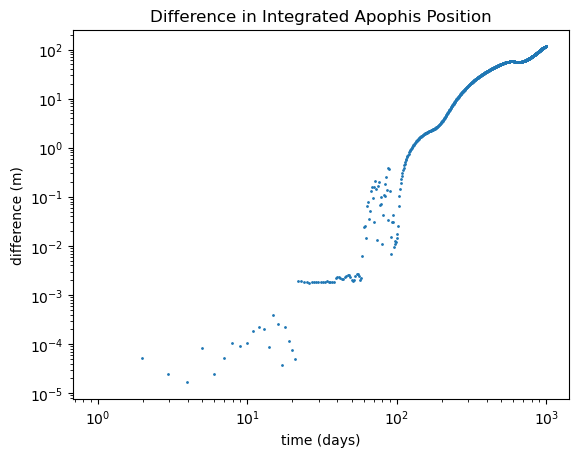

In [180]:
plt.scatter(res[1:,0], res[1:,1], s=1)
plt.xlabel('time (days)')
plt.ylabel('difference (m)')
plt.yscale('log')
plt.xscale('log')
plt.title('Difference in Integrated Apophis Position')

In [181]:
ex.detach(sim)
del(sim)


### Figure 6

In [182]:
sim = rebound.Simulation()
jpl_5303_start = rebound.Particle(
    x=-2.232847879711731E+00, y=1.574146331186095E+00, z=8.329414259670296E-01,
    vx=-6.247432571575564E-03, vy=-7.431073424167182E-03, vz=-3.231725223736132E-03)
sim.add(jpl_5303_start)

In [183]:
t_initial = 2449718.5 - ephem.jd_ref # Julian Days relative to jd_ref
sim.t = t_initial


In [184]:
extras = assist.Extras(sim, ephem)

In [185]:
t_final = 2449718.5 + 3653.0 - ephem.jd_ref
N_samples = 3653
times = np.linspace(t_initial, t_final, N_samples, endpoint=True)

ast_5303 = np.zeros((N_samples, 3))
ceres = np.zeros((N_samples, 3))

for i, t in enumerate(times):
    extras.integrate_or_interpolate(t)
    ast_5303[i] = sim.particles[0].xyz
    ceres[i] = ephem.get_particle("ceres", t).xyz

In [186]:
closest_index = np.argmin(np.linalg.norm(ast_5303[:,0:3]-ceres, axis=1))
dist_closest = np.linalg.norm(ast_5303[:,0:3]-ceres, axis=1)[closest_index]
t_closest = ephem.jd_ref+times[closest_index]

Text(0, 0.5, 'separation (AU)')

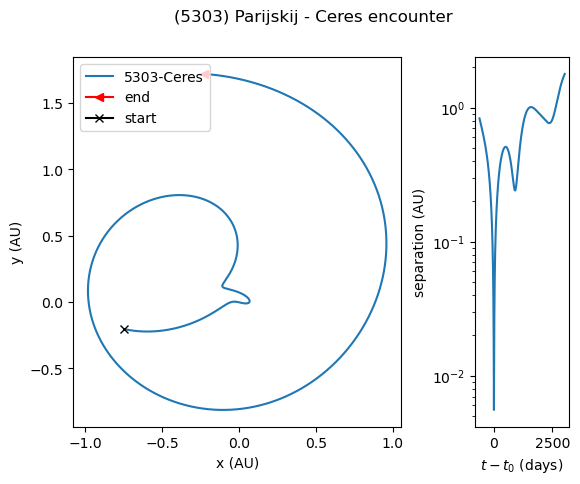

In [187]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3.5, 1]})
fig.suptitle('(5303) Parijskij - Ceres encounter')

plt.subplots_adjust(wspace=0.35)
#fig.tight_layout()

axs[0].plot(ast_5303[:,0]-ceres[:,0], ast_5303[:,1]-ceres[:,1], label='5303-Ceres')
axs[0].plot(ast_5303[-1,0]-ceres[-1,0], ast_5303[-1,1]-ceres[-1,1], c='red', marker='<', label='end')
axs[0].plot(ast_5303[0,0]-ceres[0,0], ast_5303[0,1]-ceres[0,1], c='black', marker='x', label='start')
axs[0].legend()
axs[0].set_xlabel('x (AU)')
axs[0].set_ylabel('y (AU)')

axs[1].plot(times-times[closest_index], np.linalg.norm(ast_5303[:,0:3]-ceres, axis=1))
axs[1].set_yscale('log')
axs[1].set_xlabel('$t-t_{0}$ (days)')
axs[1].set_ylabel('separation (AU)')

#plt.savefig('5303_Ceres_2panel.pdf')